# MOVIE RECOMMENDATION SYSTEM.

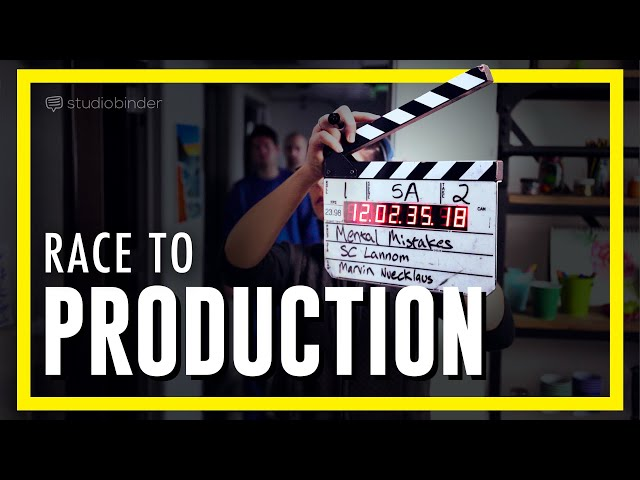

***

#**Author: Brian Kipruto Ngeny.**

**Student pace: Full time.**

**Scheduled Project review date/time: 17-09-2023, 23:59:59.**

**Instructor's name: Mark Tiba.**

**Blog post URL:**

***


> ### __Introduction.__
The movie industry has grown to be a multi-billion industry within the last century and with the advent of technology, It is expected to accelerate in growth. To date, there have been thousands of movies produced and released, meaning that there are so many options to choose from in terms of the genres, release periods and even just personal prefrences.

 This project is aimed at developing a movie recommendation system that will provide the top ten recommendations of movies specific to a user. This should help in mitigating the complexity of having to choose and decide on your own what or whether to even watch a specific movie because you will already have recommendations on what might be interesting for you to watch. 

> ### __Business understanding__.
The dataset was provided by GroupLens which is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The dataset provides information necessary for developing and training a recommendation system that will be used for recommending movies to user based on their rating of other movies.

This project's target audiences are, streaming sites and movie enthusiasts who will nolonger have to worry about what to watch next because the resulting system will be able to recommend ten movies they might be interested in watching. Streaming sites will also be able to attract more clients because of their competetive edge in being able to predict what a client might be interested in watching.

> ### __Problem statement.__
A movie enthusiast is faced with the hard task of selecting what to watch next and with so many movies being released, that challenge is only intensifying. These has prompted me to come up with a solution in the form of a recommendation system for movies. By so doing, I hope to solve the problem faced by movie enthusiasts and online streaming companies as well.   

> ### __Objectives.__
These project aims to provide a system that will be able to recommend movies to a user based on the ratings they have given to other movies. I shall explore the data provided and format it approprietly so as to come up with a functioning system that can recommend ten movies that a user is likely to be interested in.

> ### __Data Understanding.__
This datasets contained in the ml-latest-small folder describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. The folder contains `ratings.csv`, `tags.csv`, `movies.csv`, and `links.csv`.

> __Ratings.csv__<br>
These data file contains all the ratings of all the movies and has the following format;<br>
___userId,movieId,rating,timestamp___<br>

> __tags.csv__<br>
These data file contains all the tags applied to each movie by a user and has the following format;<br> 
___userId,movieId,tag,timestamp___<br> 
Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by the user.<br>

> __movies.csv__<br>
These data file contains all the information about the movies and has the following format;<br> 
___movieId,title,genres___<br>

> __links.csv__<br>
These dtata file contains all the identifiers that can be used to link to other sources of movie data. It has the following format;<br> 
___movieId,imdbId,tmdbId___

* ___userId:___ These refers to the unique identifiers for each of the users who was chosen to participate and is consistent throughout the datasets.<br>
* ___movieId:___ These refers to the unique identifiers for each of the movies and is consistent throughout the datasets.<br>
* ___rating:___ These refers to the rating a user gives a movie on a scale of 0 to 5.<br>
* ___timestamp:___ These represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.<br>
* ___title:___ These refers to the movie title and includes the year of release in parentheses.<br>
* ___genre:___ These represents the theme of the movie.<br>

****************************************************************************************************************************

### __Importing Libraries__.   
In this section, we begin by importing the necessary Python libraries and modules. These tools provide essential functions and capabilities that we will utilize throughout the project.

In [197]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline

### __Reading the Data__
Here, we read and load the individual datasets and view the information pertaining to the datasets. This step is essential for preparing the data and making it accessible for further processing.

In [198]:
# read and preview movies data
movie_data = pd.read_csv('ml-latest-small/movies.csv')
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [199]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [200]:
# read and preview ratings data
rating_data = pd.read_csv('ml-latest-small/ratings.csv')
rating_data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [201]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [202]:
# read and preview tags data
tags_data = pd.read_csv('ml-latest-small/tags.csv')
tags_data.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [203]:
tags_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [204]:
# read and preview links data
links_data = pd.read_csv('ml-latest-small/links.csv')
links_data.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [205]:
links_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


***

### Data cleaning

Now that we have the datasets, the next step is to clean the data acquired by digging deeper into each of the datasets so as to;

> I) Drop the columns we won't need.<br>
> II) Identify any missing values and drop the rows.<br>
> III) Engineer features or new columns where necessary.<br>
> IV) Merge datasets if necessary.

> a) __movie_data__

In [206]:
# drop the null columns
movie_data = movie_data.dropna()
movie_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


> b) __rating_data__

In [207]:
# drop the timestamp column
rating_data = rating_data.drop(['timestamp'], axis=1)
rating_data.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


> __Merging datasets.__<br>
We are going to merge the ___movie_data___ dataframe and the ___rating_data___ dataframe into one dataframe called ___merged_df___.

In [208]:
# merge the ratings and movies datasets
merged_df = movie_data.merge(rating_data, on='movieId')
merged_df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint (2017),Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5


In [209]:
# drop null rows
merged_df = merged_df.dropna()
merged_df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint (2017),Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5


In [210]:
# drop duplicate records
merged_df = merged_df.drop_duplicates()
merged_df

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5
100833,193585,Flint (2017),Drama,184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5


In [211]:
# Save cleaned dataset as CSV
merged_df.to_csv('ml-latest-small/merged_data.csv')

> __tags_data__

In [212]:
# drop the timestamp column
tags_data = tags_data.drop(['timestamp'], axis=1)
tags_data.head()

,userId,movieId,tag
0,2,60756,funny
1,2,60756,Highly quotable
2,2,60756,will ferrell
3,2,89774,Boxing story
4,2,89774,MMA


***

### Data analysis.

Next, I analyze the ___movie_data___ dataset to discover the top ten genres of movies that are most present within the dataset and the average rating of these genres of movies.

In [213]:
# create a list of the top ten most common genres
genres = list(movie_data['genres'].value_counts()[:10].index)
genres 

['Drama',
 'Comedy',
 'Comedy|Drama',
 'Comedy|Romance',
 'Drama|Romance',
 'Documentary',
 'Comedy|Drama|Romance',
 'Drama|Thriller',
 'Horror',
 'Horror|Thriller']

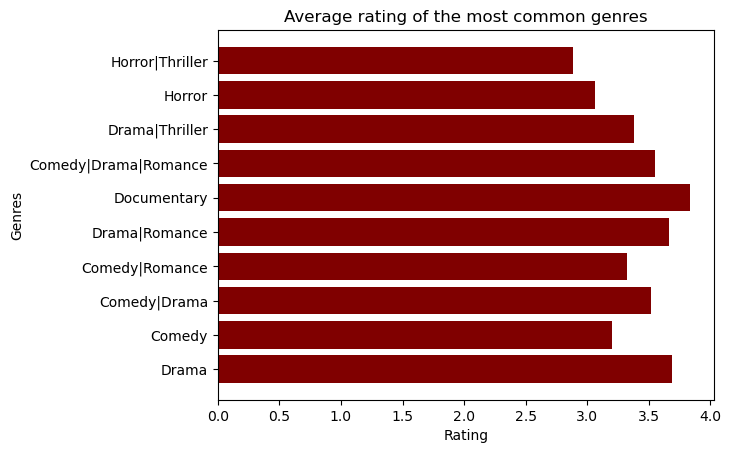

In [214]:

# group the movies by genre and find the average rating of the top ten most common genres
movies_grouped = merged_df.groupby(['genres'])['rating'].mean()

genre_rating = {}
for genre in genres:
    genre_rating[genre] = movies_grouped[genre]

# plot a bar plot of the average rating of genres
ratings = list(genre_rating.values())
plt.barh(genres, ratings, color= 'maroon')
plt.ylabel('Genres')
plt.xlabel('Rating')
plt.title('Average rating of the most common genres')
plt.show()

From the analysis done above, it is evident that these three genres; drama, documentary and comedy are the most prevalent genre of movies and also the highest rated ones. These discovery is crucial in solving the cold-start problem in a recommendation system by recommending these genres to a new user. 

Next, I will analyze the ___rating_data___ dataframe to identify the top ten users who have rated the highest number of movies and determine the average rating of each of these users.

In [215]:
# create a list of top ten users who have rated the highest number of movies
users = list(rating_data['userId'].value_counts()[:10].index)
users

[414, 599, 474, 448, 274, 610, 68, 380, 606, 288]

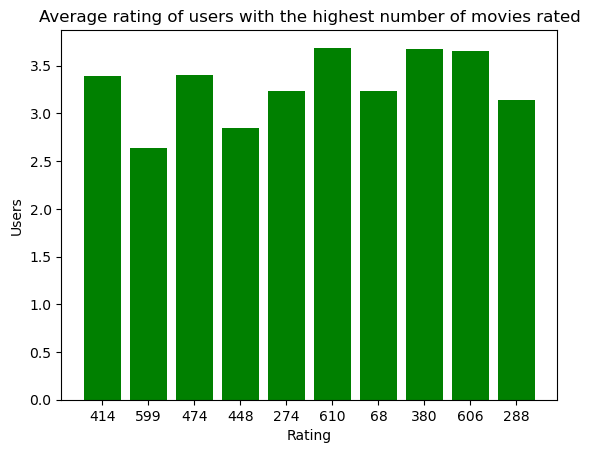

In [216]:
# group the ratings by userId and find the average rating of the top ten users who have rated the highest number of movies
ratings_grouped = rating_data.groupby(['userId'])['rating'].mean()

user_rating = {}
for user in users:
    user_rating[user] = ratings_grouped[user]

# plot a bar plot of the average rating of genres
users = [str(i) for i in users]
user_ratings = list(user_rating.values())
plt.bar(users, user_ratings, color= 'green')
plt.ylabel('Users')
plt.xlabel('Rating')
plt.title('Average rating of users with the highest number of movies rated')
plt.show()

These analysis steps have brought to light the discovery that movies within these dataset are  on average rated at 2.5 and 3.5 out of the possible 5. These discovery was first visualized by the barplot of average rating of the top the most common genre of movies and later confirmed by the barplot of the average rating of the top ten users with the highest number of movies rated.   

### Modelling.
Now, we need to split our ___rating_data___ data frame into two parts, one part to train the algorithm to predict ratings and the other part to test whether the predicted movies are close to what was expected. This will help in evaluating our models.

We will take y as ___userId___ just to ensure that the splitting leads to stratified sampling and we have all the user_ids in the training set to make our algorithm powerful.

In [ ]:
# split the data into X and y
X = rating_data.copy()
y = rating_data['userId']

#Split into training and test datasets, stratified along user_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=1)

In [ ]:
# pivot our X_train to create a sparse dataframe
sparse_ratings = X_train.pivot(index='userId', columns='movieId', values='rating')
sparse_ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,190219,191005,193565,193567,193571,193573,193579,193581,193585,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
